In [ ]:
import numpy as np
import rasterio as rio

import matplotlib.pyplot, matplotlib.colors

import os, json 

import ee, geetools, geetools.batch

In [97]:
# Uncomment to use the hand-labeled images
_img_path = "/home/cmich/v1.1/data/flood_events/HandLabeled/S1Hand/"
_mask_path = "/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/"
_catalog_path = "/home/cmich/v1.1/catalog/sen1floods11_hand_labeled_label/"

# Uncomment to use the weakly-labeled images
# _img_path = "/home/cmich/v1.1/data/flood_events/WeaklyLabeled/S1Weak/"
# _mask_path = "/home/cmich/v1.1/data/flood_events/WeaklyLabeled/S2IndexLabelWeak/"
# _catalog_path = "/home/cmich/v1.1/catalog/sen1floods11_weak_labeled_label/"

In [98]:
land_use_dict = {}

for file in os.listdir(_mask_path):
    # file path 
    file_path = _mask_path + file
    
    # Load a segmentation mask
    mask = rio.open(file_path).read()[0,:,:]

    # Histogram of land-coverage
    unique, counts = np.unique(mask.flatten(), return_counts=True)
    hist = dict(zip(unique, counts))

    for i in (-1, 0, 1):
        if i not in hist:
            hist[i] = 0

    # Measure water-coverage ratio for this particular segmentation mask
    water_count = hist[1]
    soil_count = hist[0]
    water_ratio = 100 * water_count / (water_count + soil_count + 1)

    # Discard images with negligible water coverage
    # Store the rest in a Python dictionary
    if water_ratio > 15:
        land_use_dict[file] = water_ratio
        print(file)

Nigeria_529525_LabelHand.tif
Paraguay_581976_LabelHand.tif
Paraguay_305760_LabelHand.tif
India_533192_LabelHand.tif
India_383430_LabelHand.tif
Bolivia_314919_LabelHand.tif
Paraguay_657443_LabelHand.tif
India_1018317_LabelHand.tif
India_80221_LabelHand.tif
USA_905409_LabelHand.tif
Spain_4282030_LabelHand.tif
India_943439_LabelHand.tif
India_1050276_LabelHand.tif
Mekong_16233_LabelHand.tif
Nigeria_600295_LabelHand.tif
Paraguay_34417_LabelHand.tif
Spain_8372658_LabelHand.tif
Bolivia_432776_LabelHand.tif
India_1068117_LabelHand.tif
Paraguay_1029191_LabelHand.tif
Ghana_1033830_LabelHand.tif
Sri-Lanka_847275_LabelHand.tif
Nigeria_984831_LabelHand.tif
Nigeria_1095404_LabelHand.tif
Nigeria_812045_LabelHand.tif
Spain_5650136_LabelHand.tif
Sri-Lanka_92824_LabelHand.tif
Paraguay_896458_LabelHand.tif
Mekong_98310_LabelHand.tif
Paraguay_482517_LabelHand.tif
USA_86502_LabelHand.tif
Paraguay_149787_LabelHand.tif
Spain_3285448_LabelHand.tif
USA_217598_LabelHand.tif
Paraguay_989230_LabelHand.tif
Spain_

1.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Nigeria_529525_LabelHand.tif


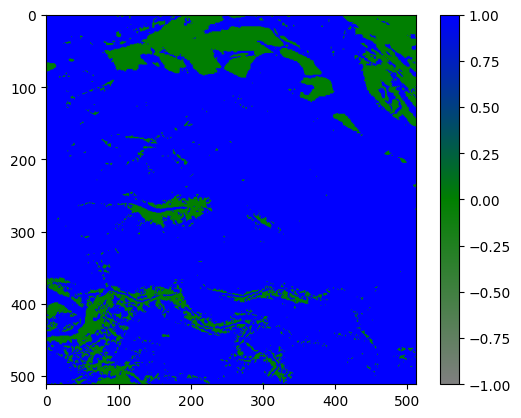

2.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Paraguay_581976_LabelHand.tif


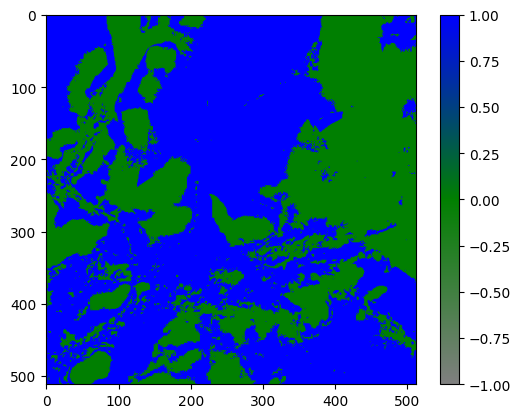

3.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Paraguay_305760_LabelHand.tif


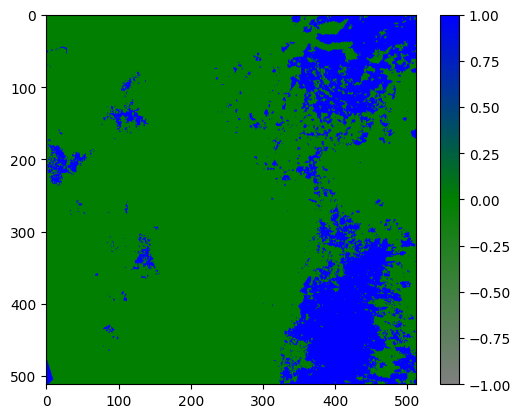

4.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_533192_LabelHand.tif


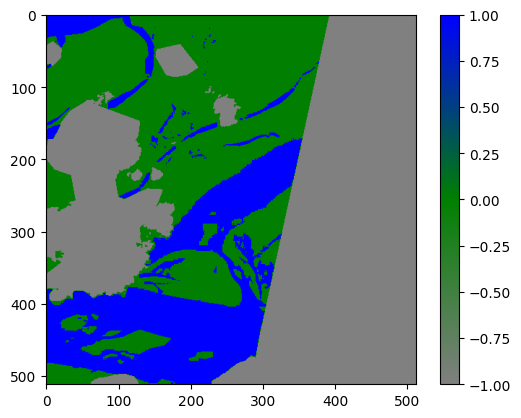

5.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_383430_LabelHand.tif


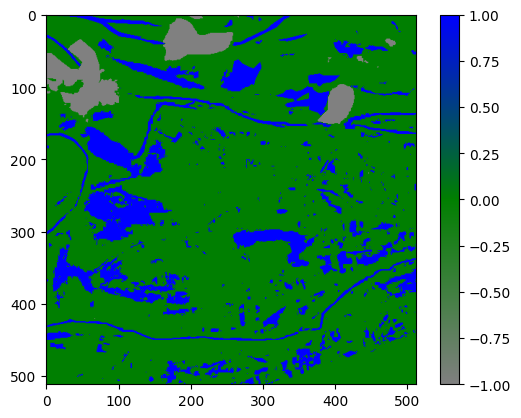

6.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Bolivia_314919_LabelHand.tif


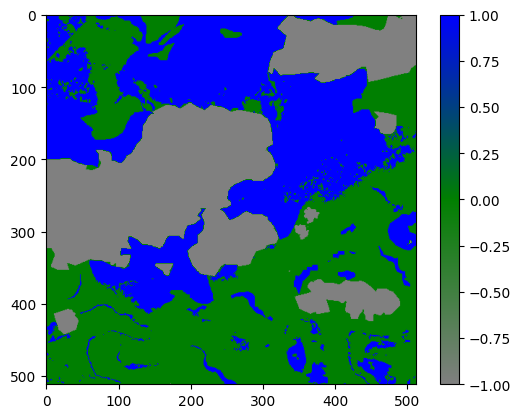

7.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Paraguay_657443_LabelHand.tif


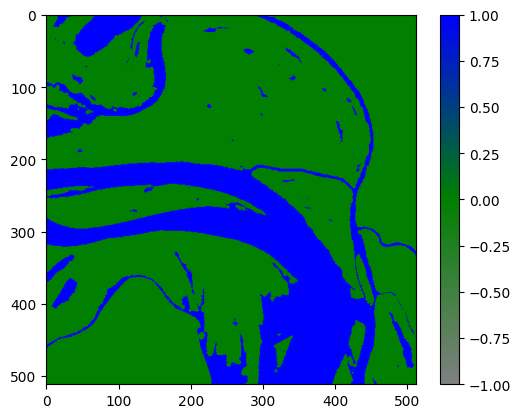

8.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_1018317_LabelHand.tif


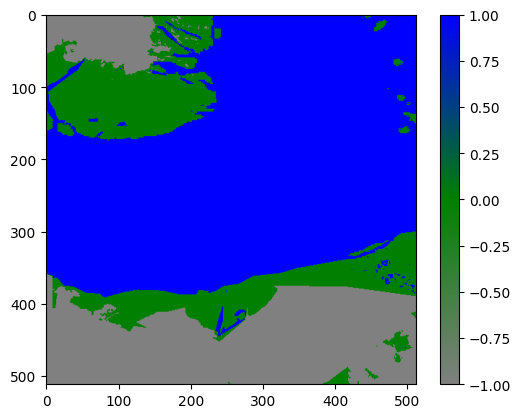

9.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_80221_LabelHand.tif


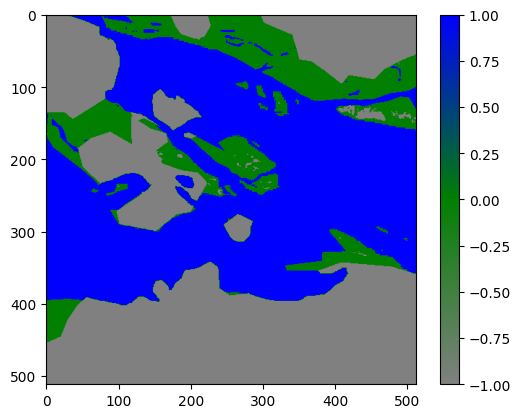

10.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/USA_905409_LabelHand.tif


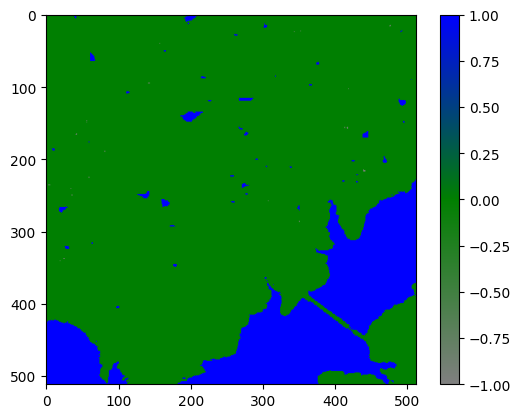

11.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Spain_4282030_LabelHand.tif


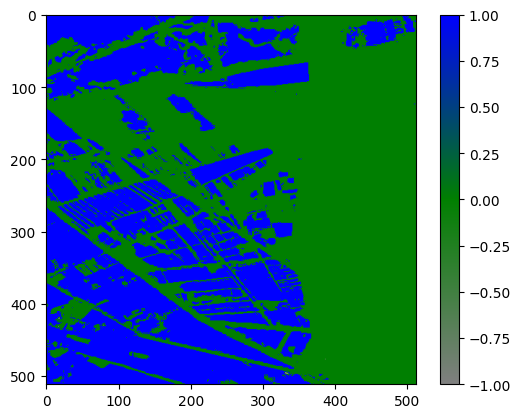

12.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_943439_LabelHand.tif


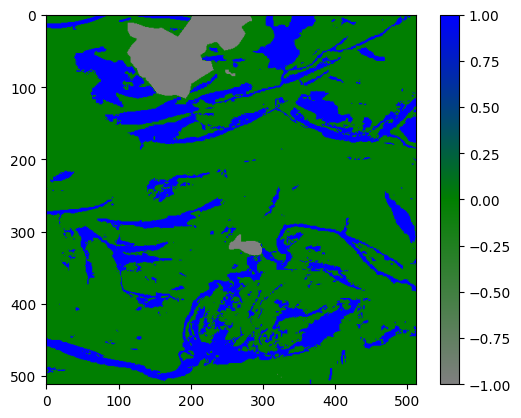

13.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_1050276_LabelHand.tif


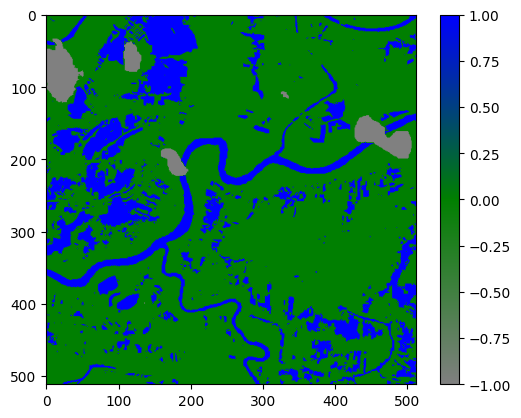

14.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Mekong_16233_LabelHand.tif


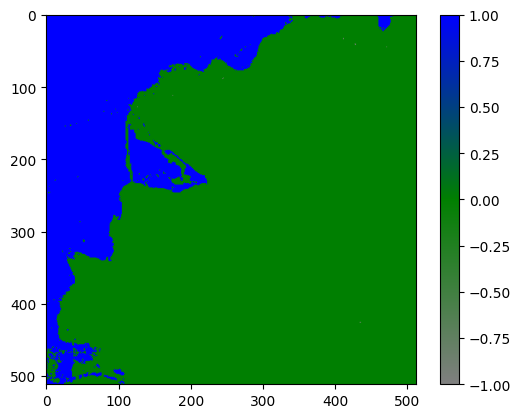

15.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Nigeria_600295_LabelHand.tif


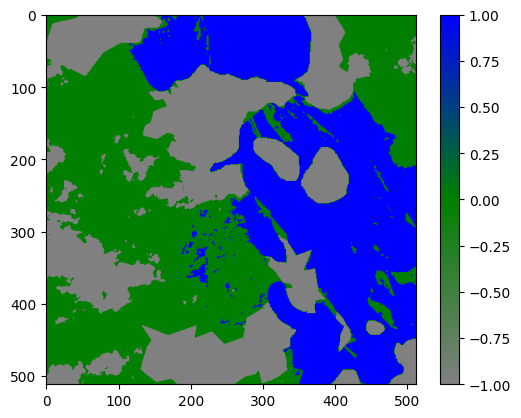

16.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Paraguay_34417_LabelHand.tif


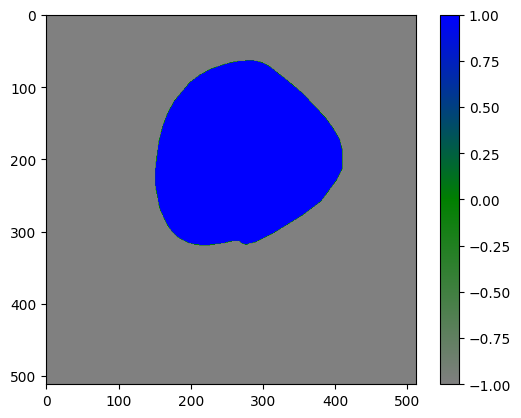

17.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Spain_8372658_LabelHand.tif


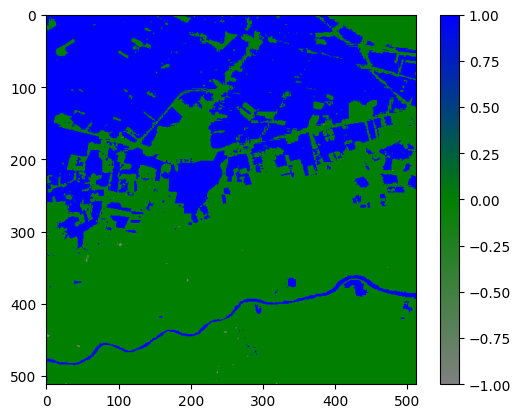

18.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Bolivia_432776_LabelHand.tif


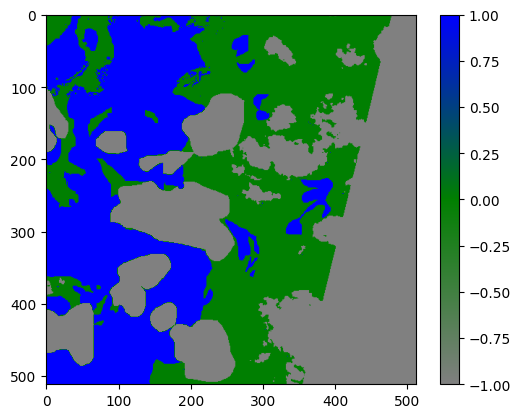

19.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_1068117_LabelHand.tif


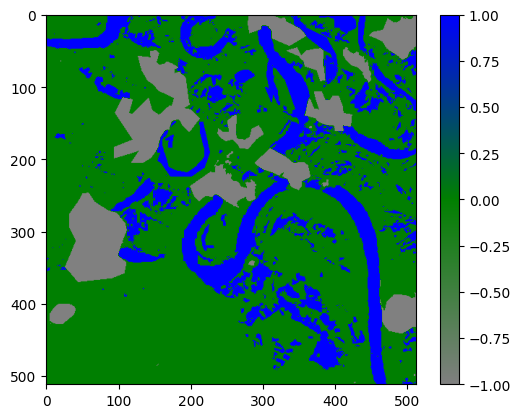

20.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Paraguay_1029191_LabelHand.tif


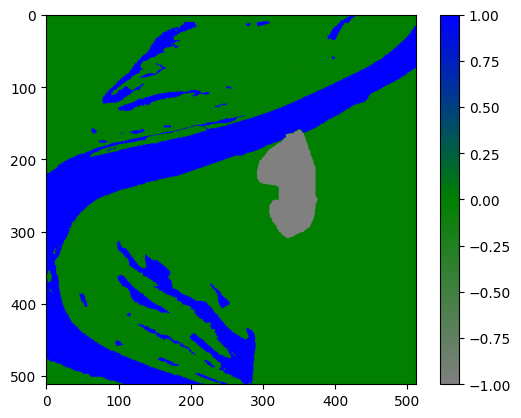

21.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Ghana_1033830_LabelHand.tif


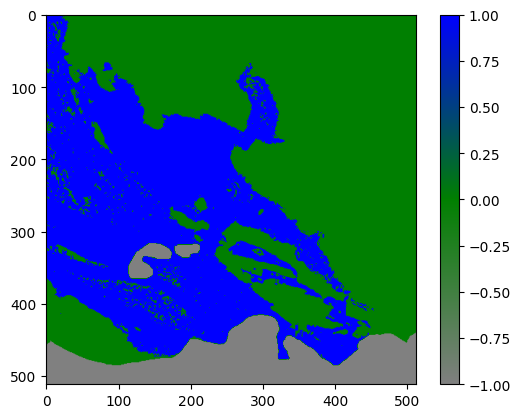

22.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Sri-Lanka_847275_LabelHand.tif


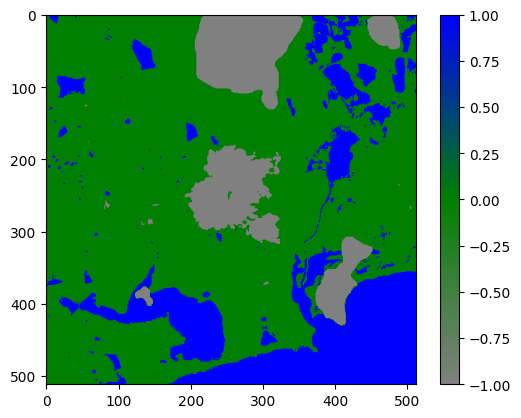

23.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Nigeria_984831_LabelHand.tif


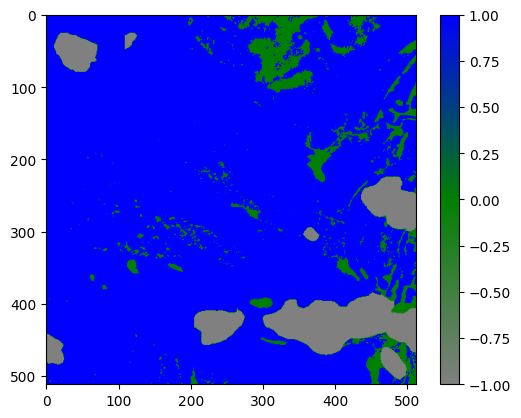

24.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Nigeria_1095404_LabelHand.tif


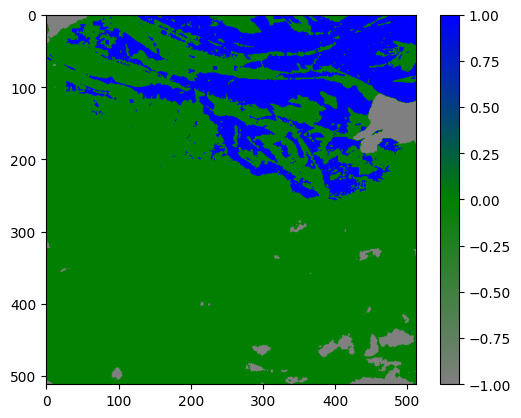

25.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Nigeria_812045_LabelHand.tif


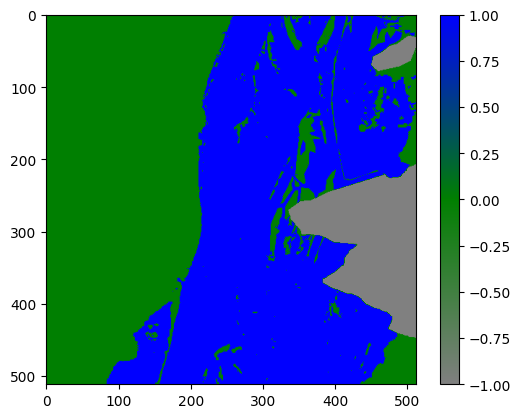

26.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Spain_5650136_LabelHand.tif


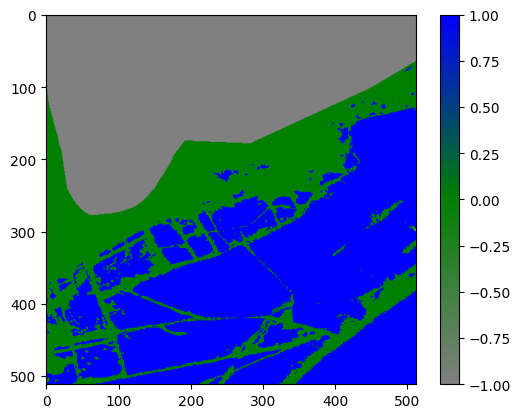

27.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Sri-Lanka_92824_LabelHand.tif


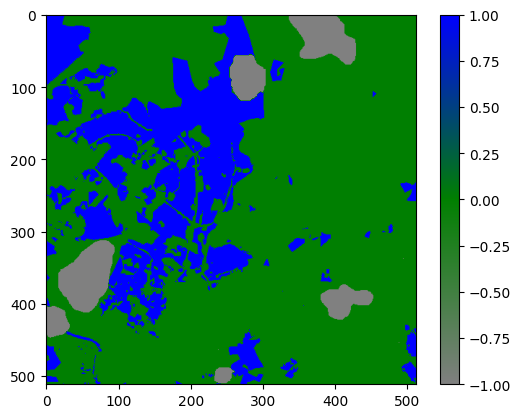

28.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Paraguay_896458_LabelHand.tif


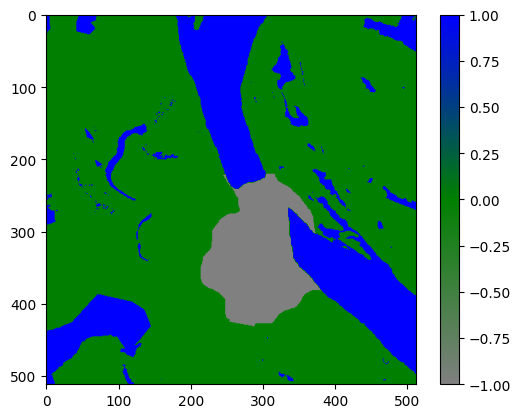

29.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Mekong_98310_LabelHand.tif


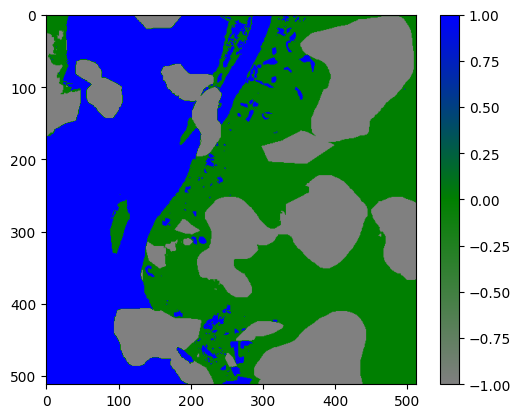

30.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Paraguay_482517_LabelHand.tif


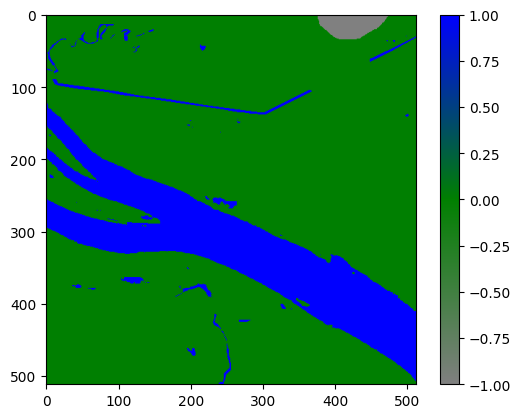

31.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/USA_86502_LabelHand.tif


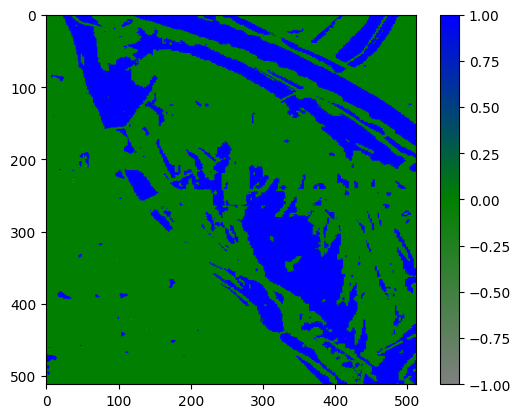

32.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Paraguay_149787_LabelHand.tif


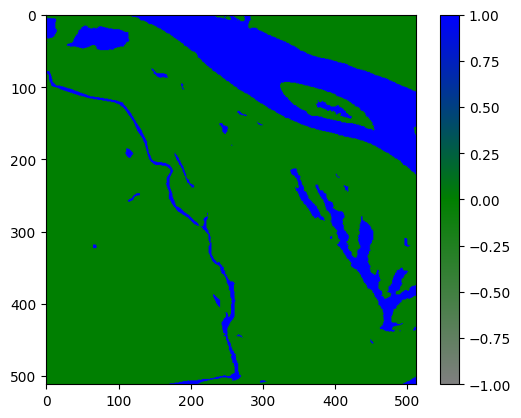

33.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Spain_3285448_LabelHand.tif


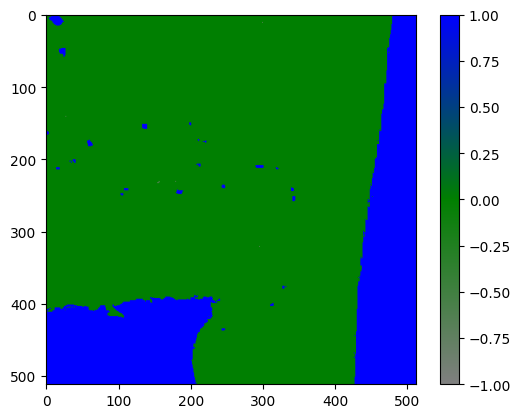

34.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/USA_217598_LabelHand.tif


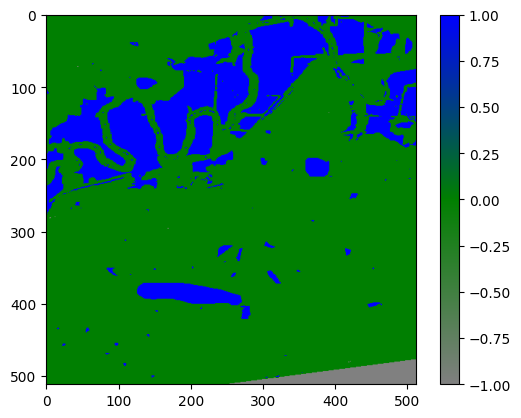

35.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Paraguay_989230_LabelHand.tif


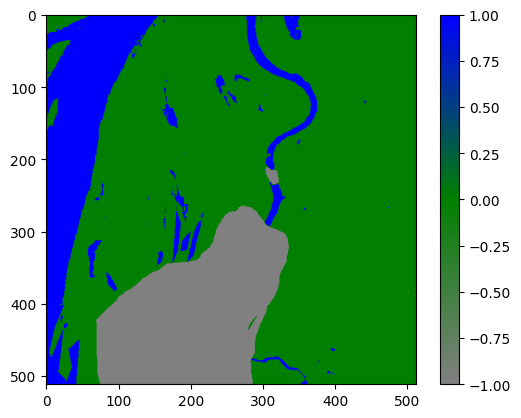

36.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Spain_1167260_LabelHand.tif


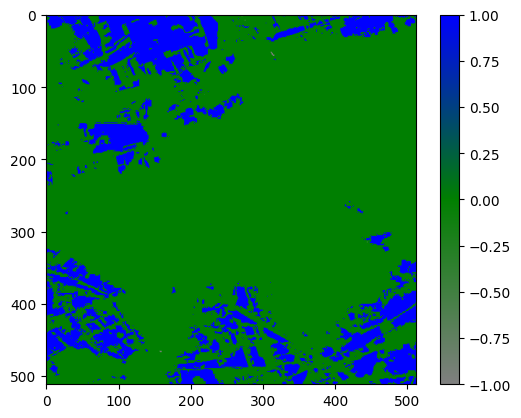

37.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Ghana_141910_LabelHand.tif


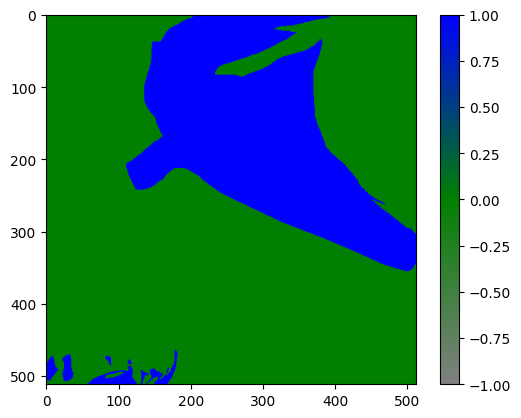

38.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Paraguay_1029042_LabelHand.tif


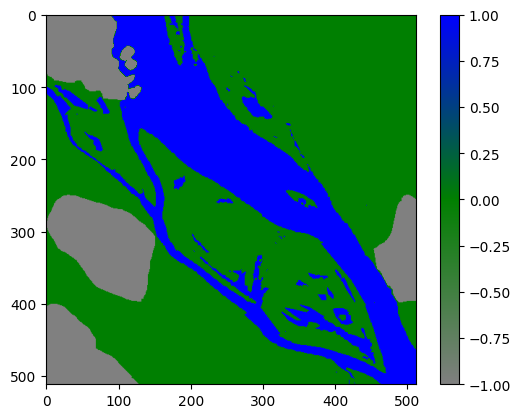

39.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Pakistan_35915_LabelHand.tif


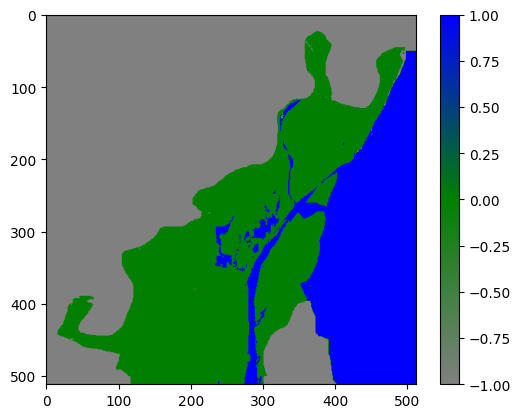

40.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_103447_LabelHand.tif


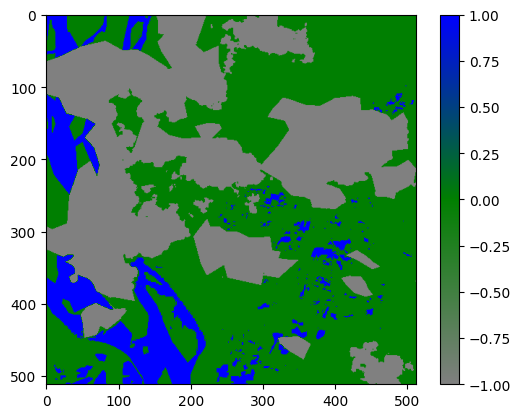

41.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_591317_LabelHand.tif


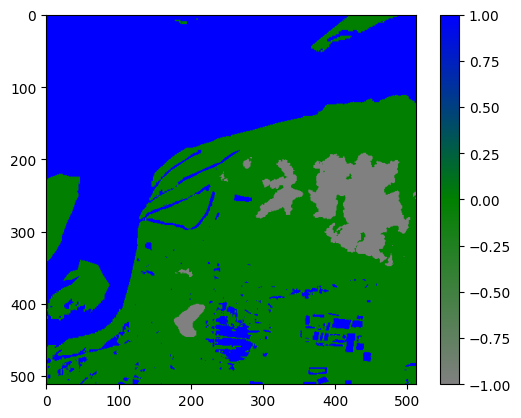

42.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Bolivia_103757_LabelHand.tif


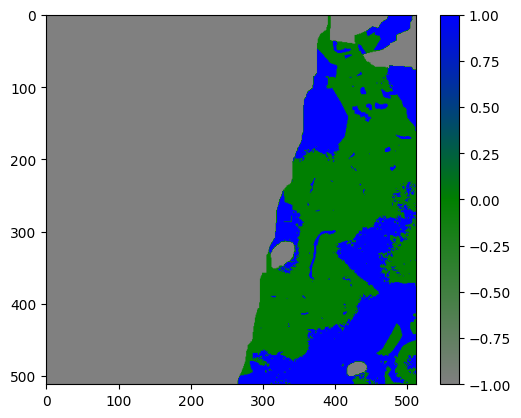

43.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Pakistan_1027214_LabelHand.tif


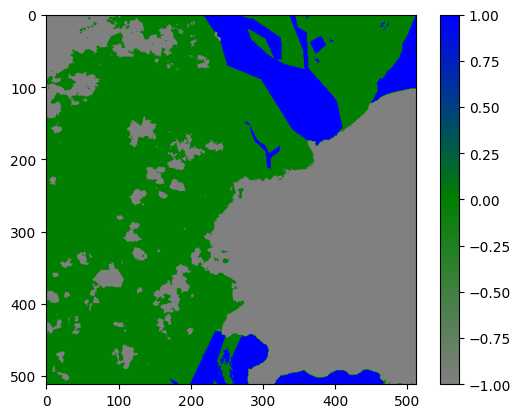

44.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Sri-Lanka_534068_LabelHand.tif


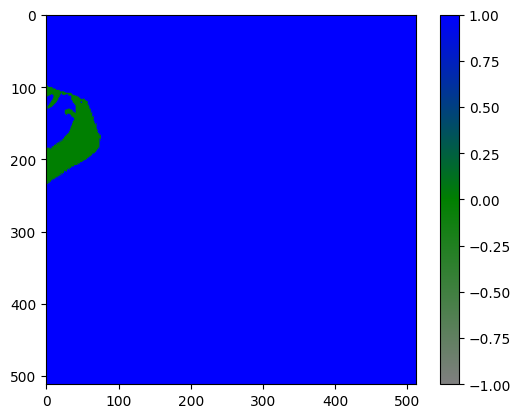

45.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Sri-Lanka_916628_LabelHand.tif


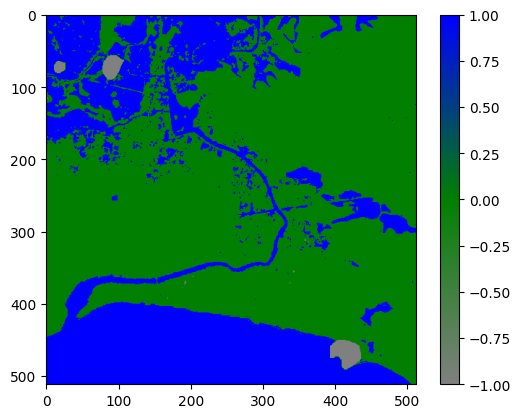

46.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Somalia_886726_LabelHand.tif


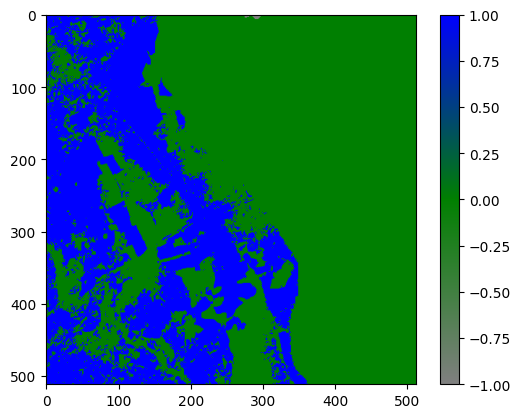

47.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Sri-Lanka_321316_LabelHand.tif


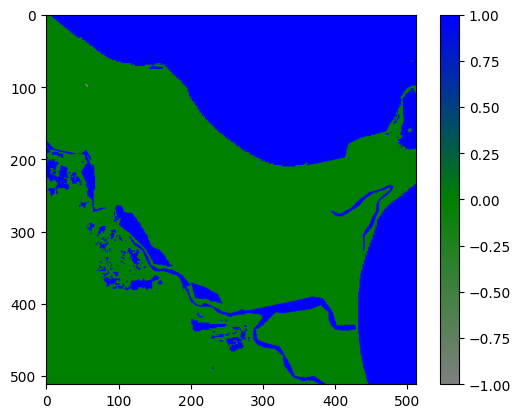

48.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_399883_LabelHand.tif


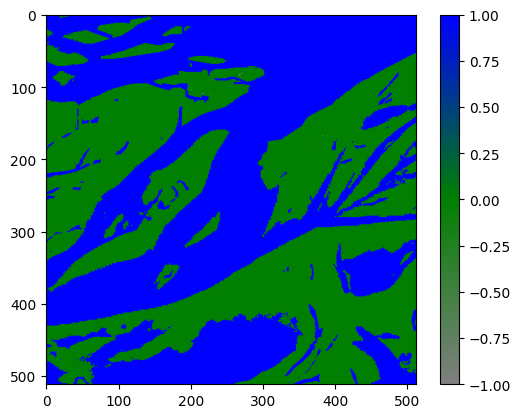

49.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Paraguay_126224_LabelHand.tif


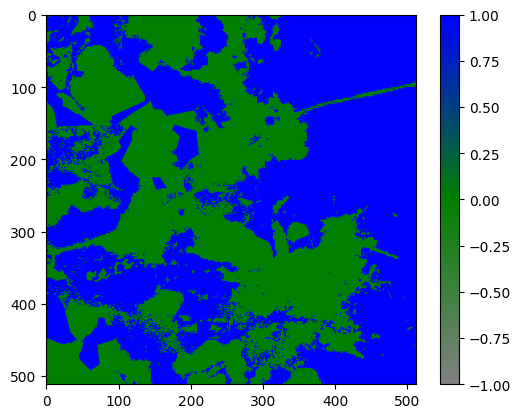

50.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Paraguay_605682_LabelHand.tif


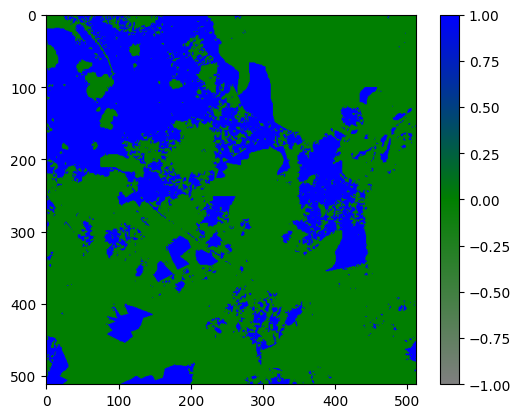

51.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Paraguay_62897_LabelHand.tif


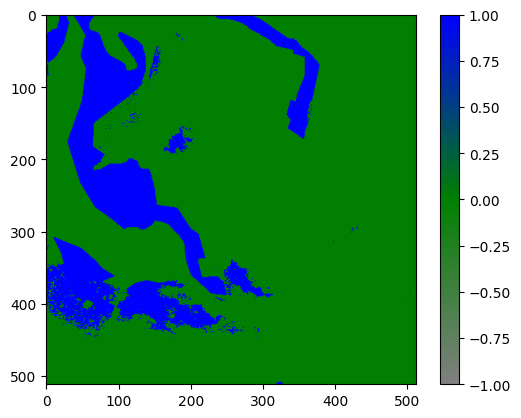

52.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Ghana_868803_LabelHand.tif


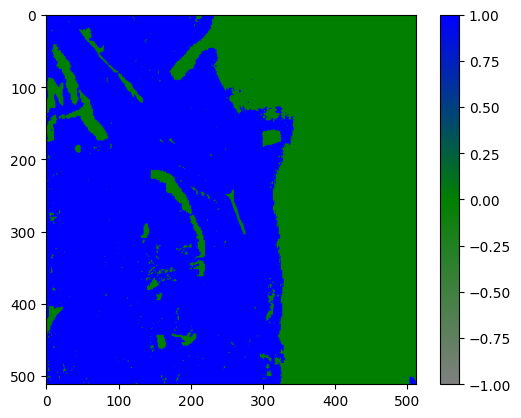

53.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_1017769_LabelHand.tif


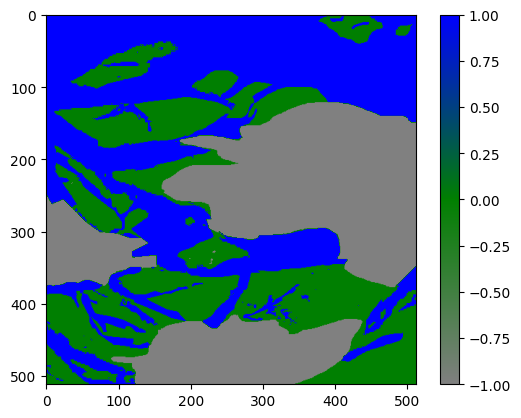

54.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Somalia_322855_LabelHand.tif


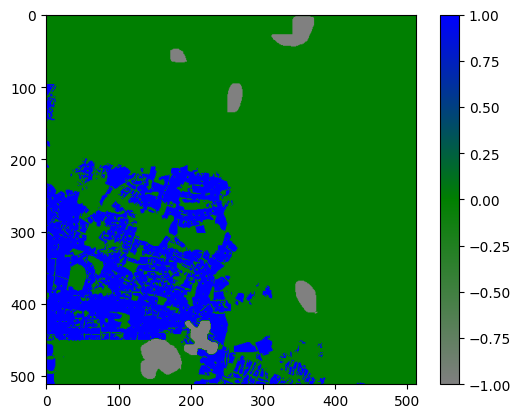

55.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_287642_LabelHand.tif


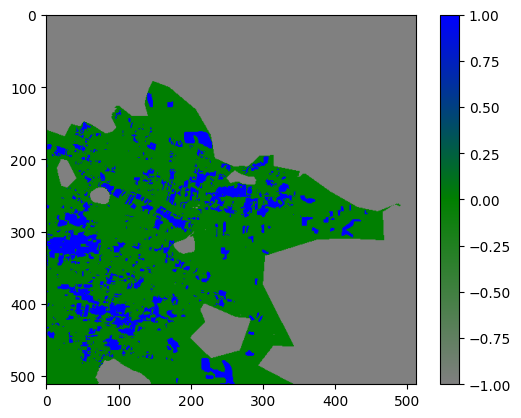

56.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Nigeria_598959_LabelHand.tif


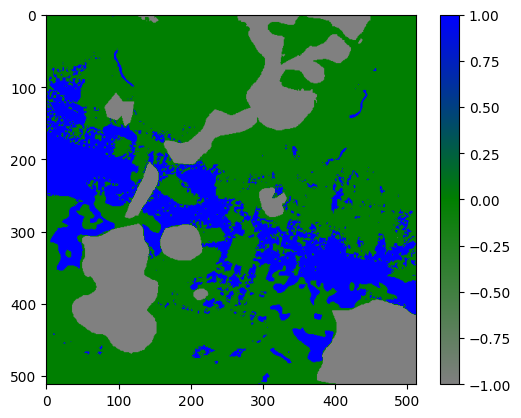

57.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Ghana_319168_LabelHand.tif


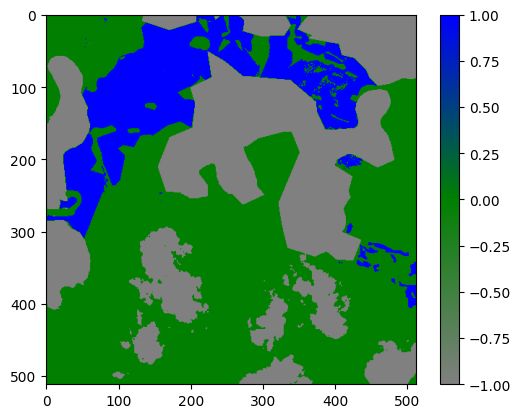

58.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Mekong_52610_LabelHand.tif


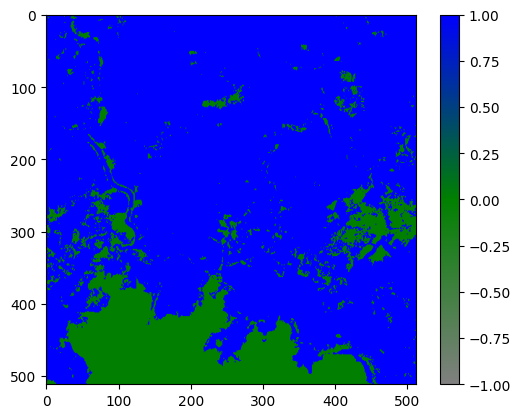

59.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Mekong_1443339_LabelHand.tif


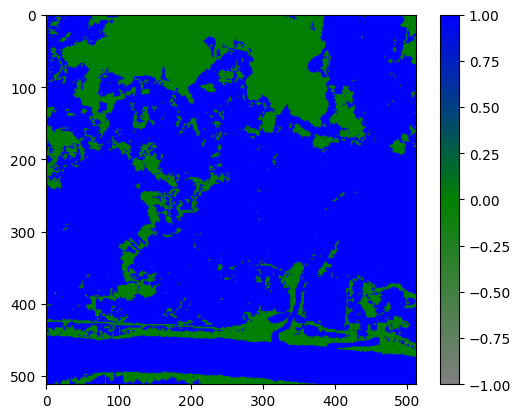

60.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Sri-Lanka_612594_LabelHand.tif


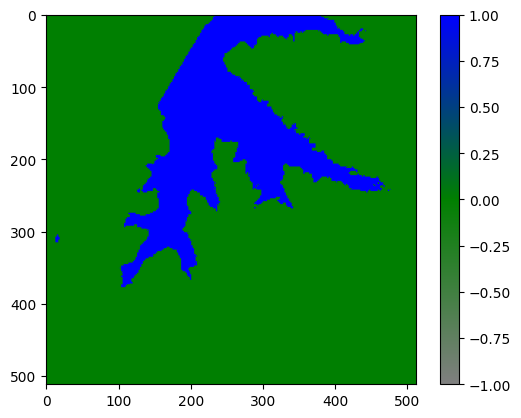

61.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Nigeria_81933_LabelHand.tif


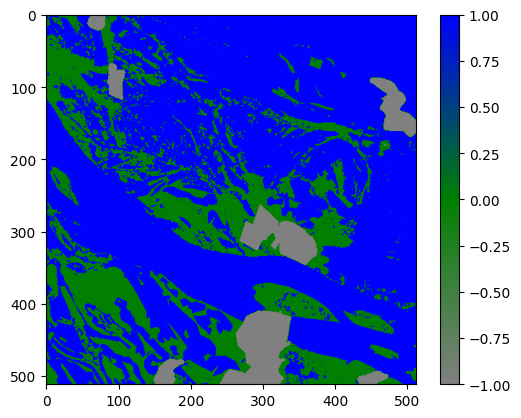

62.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_804466_LabelHand.tif


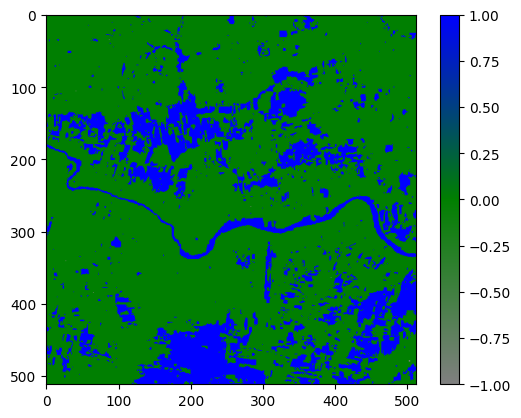

63.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_900498_LabelHand.tif


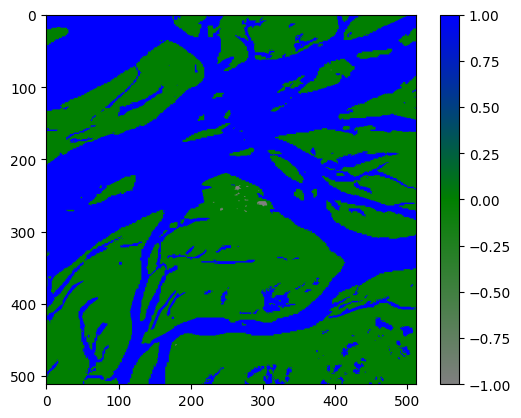

64.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/USA_788696_LabelHand.tif


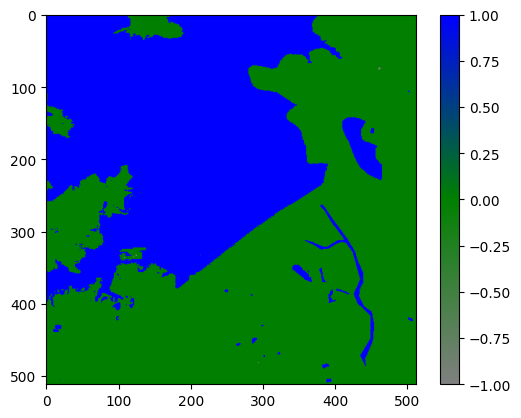

65.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Somalia_970508_LabelHand.tif


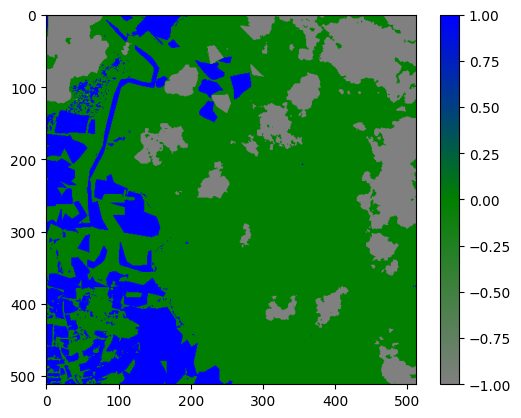

66.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Mekong_1248200_LabelHand.tif


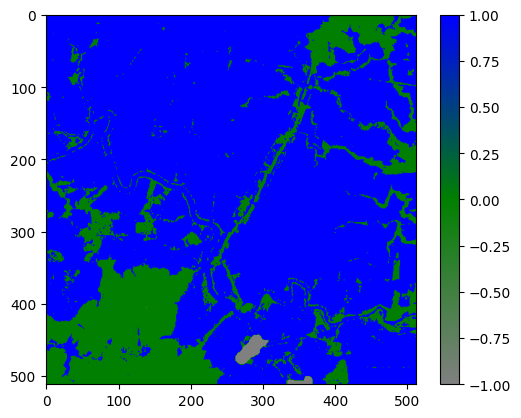

67.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Paraguay_24341_LabelHand.tif


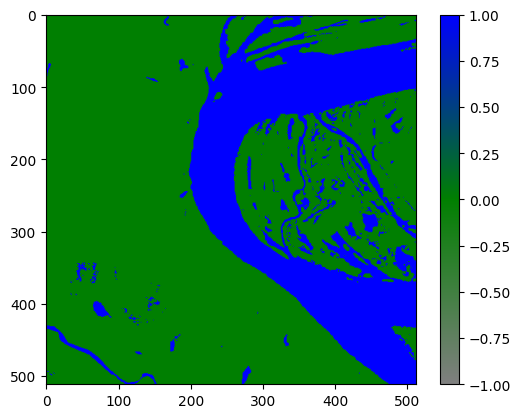

68.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Spain_5923267_LabelHand.tif


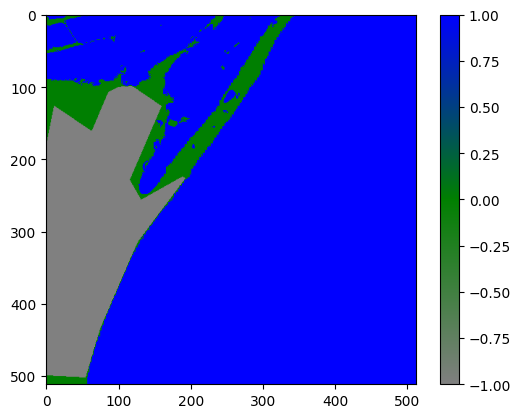

69.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Somalia_12849_LabelHand.tif


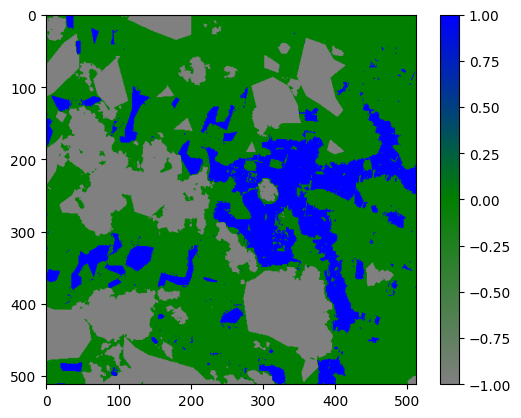

70.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Spain_8565131_LabelHand.tif


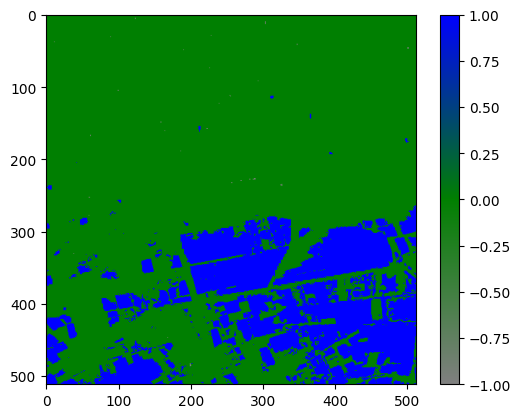

71.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Mekong_774566_LabelHand.tif


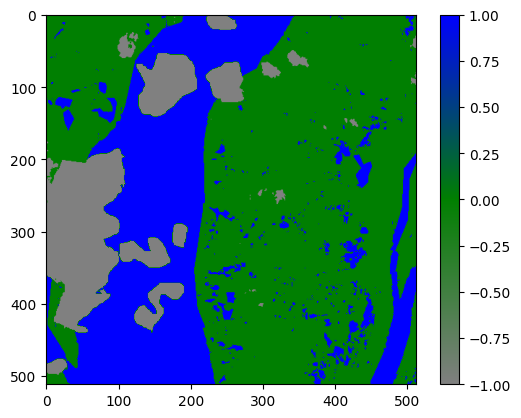

72.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Mekong_1439641_LabelHand.tif


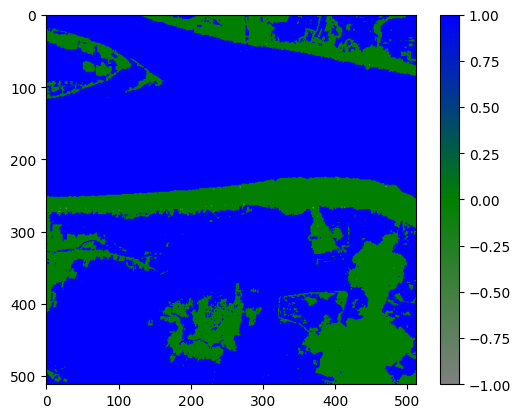

73.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Sri-Lanka_713926_LabelHand.tif


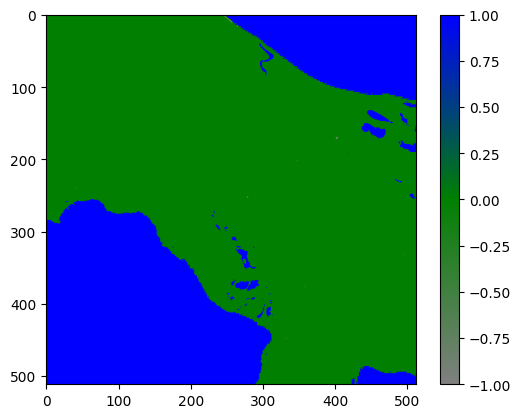

74.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Mekong_1396181_LabelHand.tif


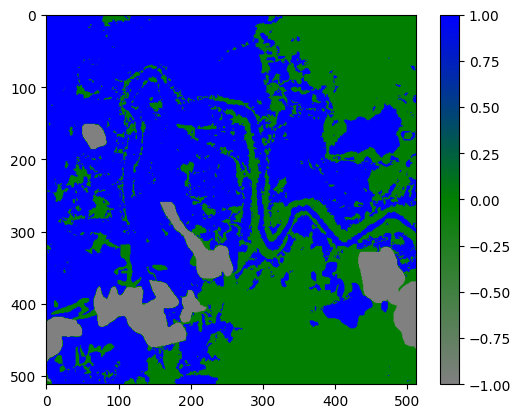

75.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_180633_LabelHand.tif


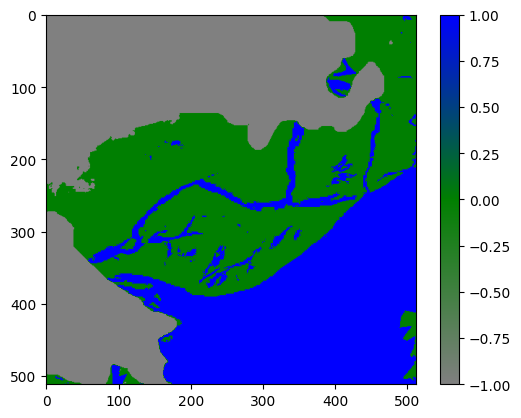

76.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Bolivia_242570_LabelHand.tif


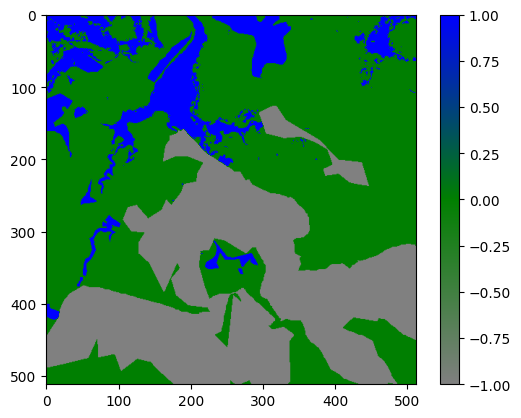

77.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Sri-Lanka_845821_LabelHand.tif


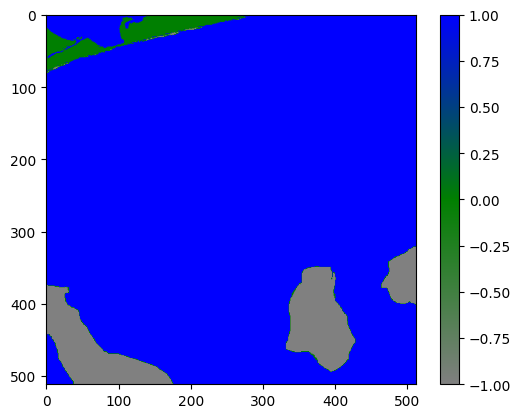

78.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Pakistan_1036366_LabelHand.tif


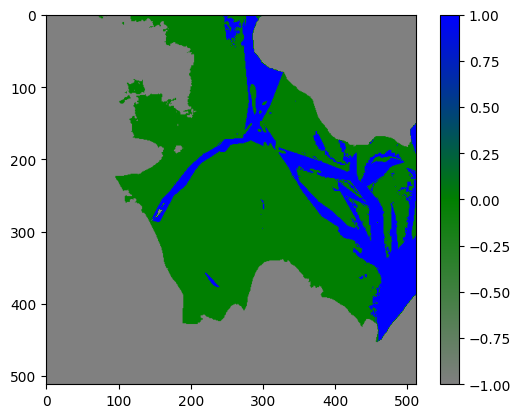

79.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Pakistan_849790_LabelHand.tif


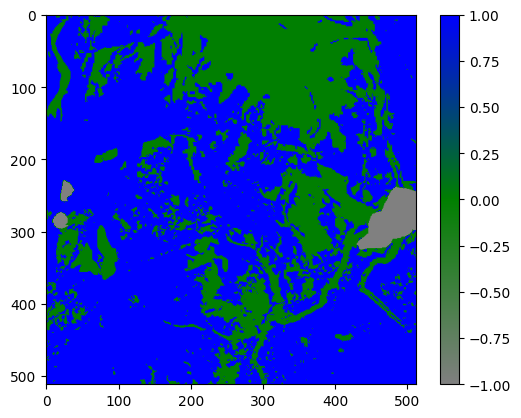

80.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Bolivia_129334_LabelHand.tif


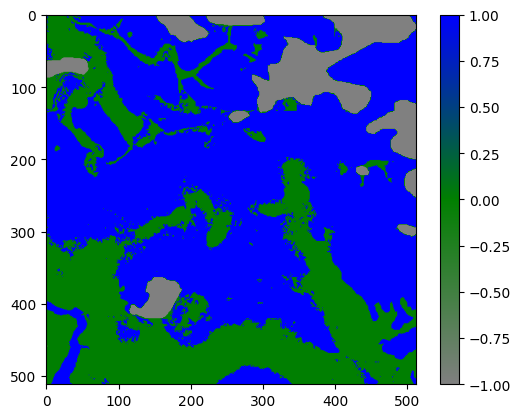

81.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Paraguay_822142_LabelHand.tif


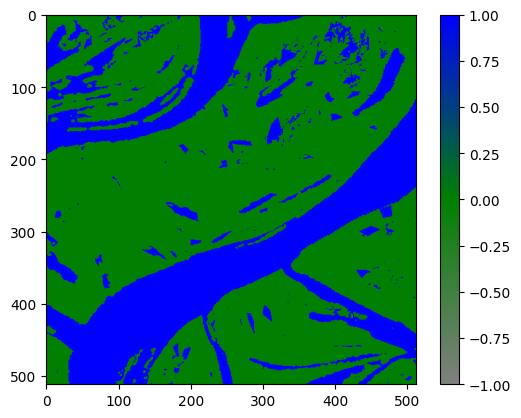

82.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Spain_7370579_LabelHand.tif


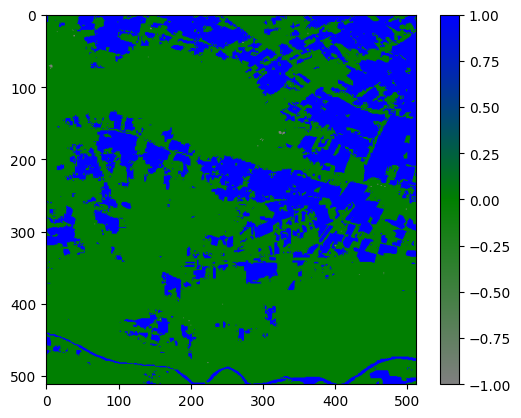

83.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_956930_LabelHand.tif


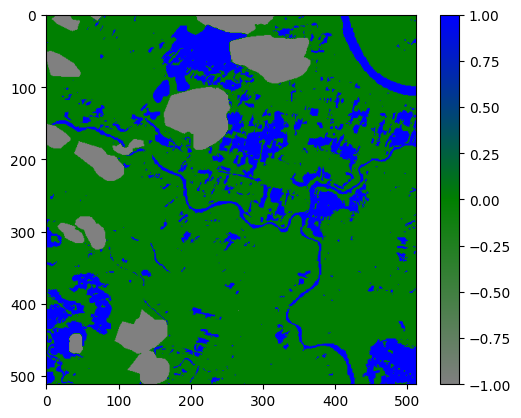

84.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Ghana_866994_LabelHand.tif


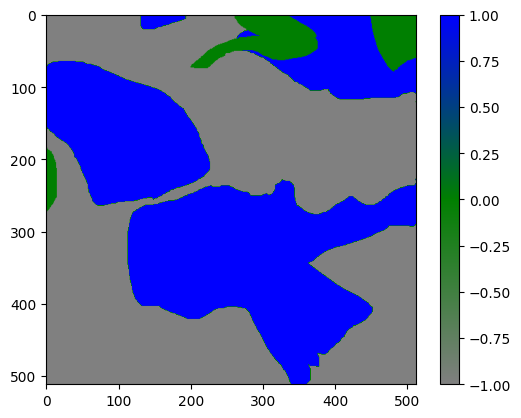

85.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/India_747992_LabelHand.tif


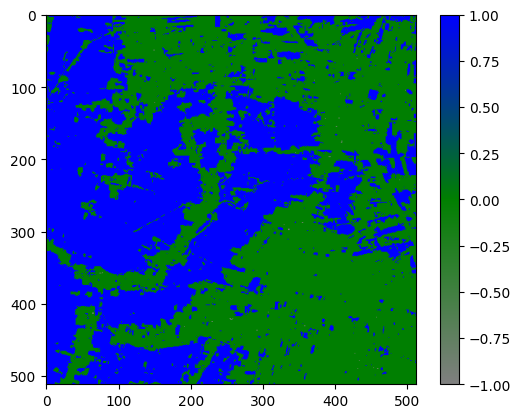

86.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/USA_366607_LabelHand.tif


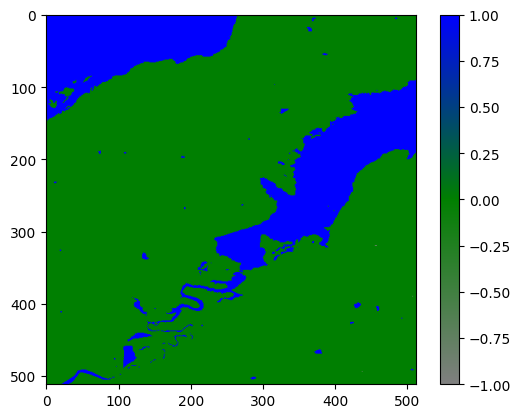

87.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Mekong_596495_LabelHand.tif


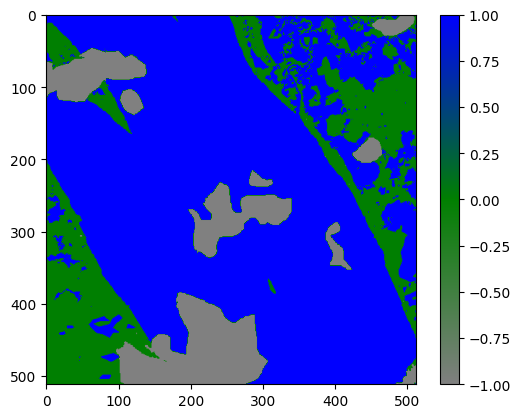

88.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Somalia_371421_LabelHand.tif


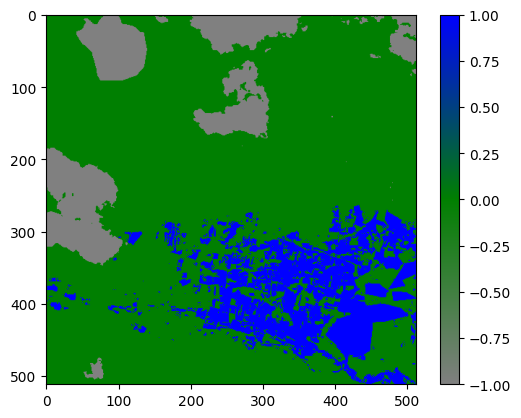

89.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Sri-Lanka_14484_LabelHand.tif


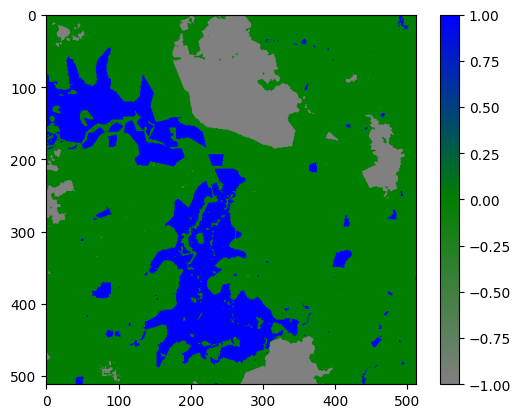

90.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/USA_170264_LabelHand.tif


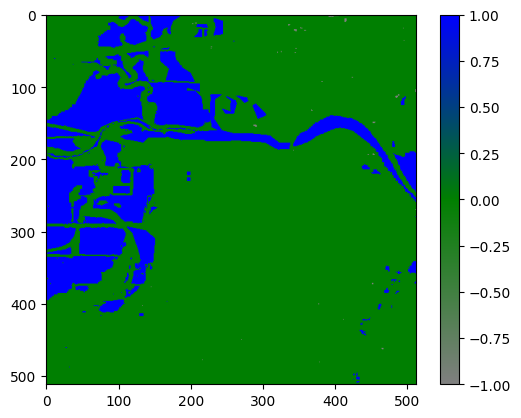

91.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Ghana_247288_LabelHand.tif


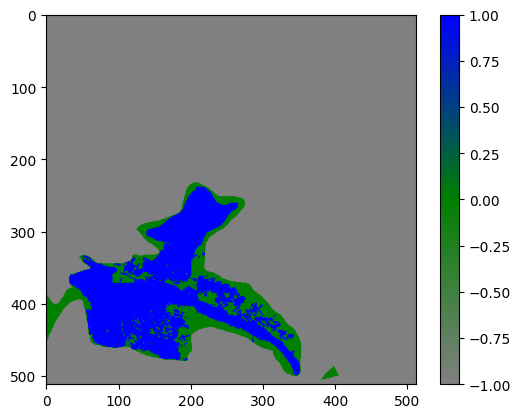

92.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Pakistan_94095_LabelHand.tif


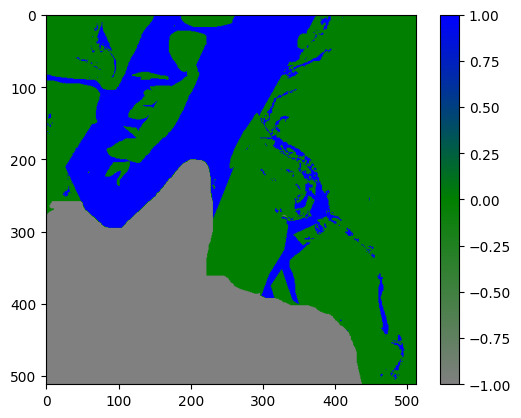

93.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Paraguay_339807_LabelHand.tif


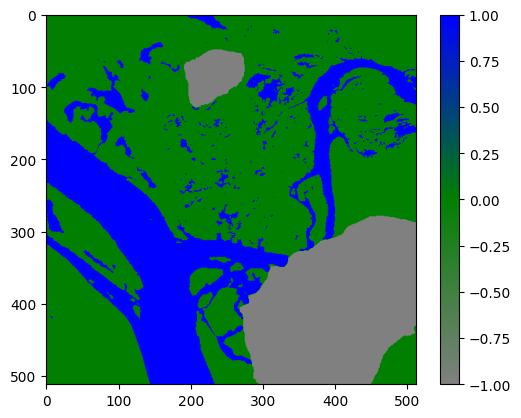

94.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Mekong_922373_LabelHand.tif


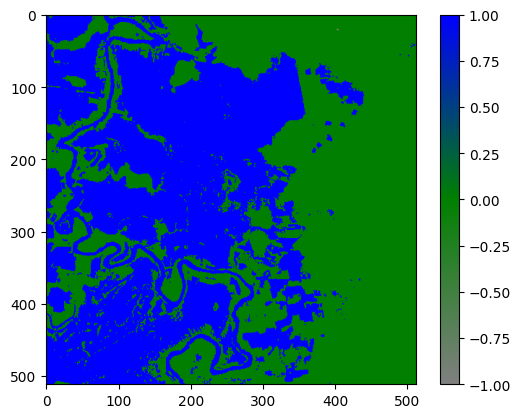

95.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Spain_7387658_LabelHand.tif


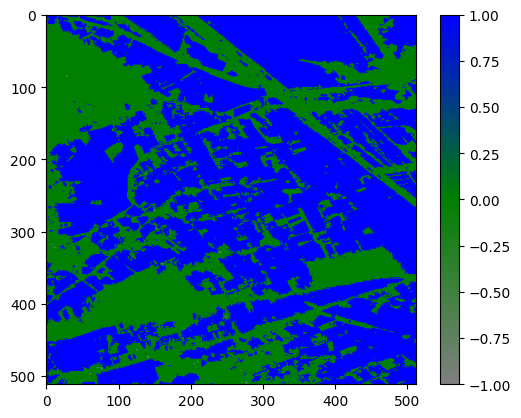

96.	/home/cmich/v1.1/data/flood_events/HandLabeled/LabelHand/Mekong_977338_LabelHand.tif


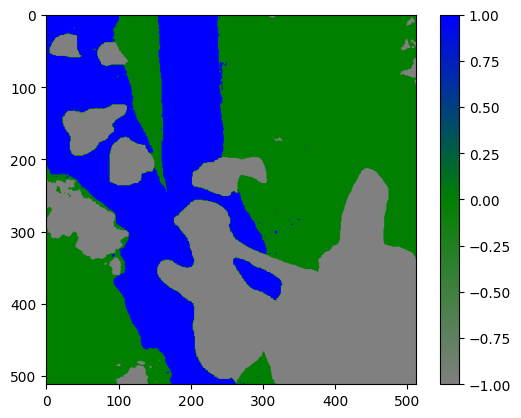

In [99]:
# Iterate through the selected images 
for i,key in enumerate(land_use_dict):
    print("{}.\t{}".format(i+1, _mask_path + key))

    # Plot the segmentation mask 
    mask = rio.open(_mask_path + key).read()[0,:,:]

    # Colormap settings: 
    # Blue  -> Soil Class [+1]
    # Green -> Water Class [0]
    # Gray  -> NoData Class [-1]
    norm = matplotlib.pyplot.Normalize(-1,+1)
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["gray","green","blue"])

    matplotlib.pyplot.figure(i)
    matplotlib.pyplot.imshow(mask, cmap=cmap, norm=norm)
    matplotlib.pyplot.colorbar()
    matplotlib.pyplot.show() 

In [100]:
aoi = []

# Iterate through all the selected files / segmentation masks
for i, key in enumerate(land_use_dict):
    
    # Find the corresponding geoJSON file 
    geoJSON_path = _catalog_path + key[:-14] + "_label/" + key[:-14] + "_label.json"

    # Read the contents of the geoJSON file 
    with open(geoJSON_path, 'r') as geoJSON_file:  
        geoJSON = json.load(geoJSON_file) 

    # Retrieve the coordinates of the region  
    x = 0.5 * (geoJSON['bbox'][0] + geoJSON['bbox'][2]) 
    y = 0.5 * (geoJSON['bbox'][1] + geoJSON['bbox'][3]) 
    
    # Retrieve the acquisition date of the image
    date = geoJSON['properties']['datetime']

    # Save the area of interest to a list for later use
    aoi.append((key[:-14], x, y))

    # Print the coordinates of the region
    print(i, *aoi[i])

0 Nigeria_529525 5.588239719450719 8.945782925375843
1 Paraguay_581976 -56.963250144359804 -24.85961784660999
2 Paraguay_305760 -57.00924388690672 -24.72163661896923
3 India_533192 93.89622540953616 26.791355033580608
4 India_383430 93.5282754691608 26.65337380593985
5 Bolivia_314919 -65.10414257516454 -14.327050803365426
6 Paraguay_657443 -57.23921259964132 -23.9397429956716
7 India_1018317 92.7923755884101 26.56138632084601
8 India_80221 92.74638184586317 26.56138632084601
9 USA_905409 -94.90808774556838 38.70373435323276
10 Spain_4282030 -0.7129030094772524 38.15180944266973
11 India_943439 93.34430049897313 26.60738006339293
12 India_1050276 92.51641313312858 26.19343638047065
13 Mekong_16233 105.80860472918832 12.165344903660205
14 Nigeria_600295 5.818208432185316 8.991776667922762
15 Paraguay_34417 -57.74514376765744 -24.399680421140793
16 Spain_8372658 -0.7129030094772524 38.105815700122804
17 Bolivia_432776 -65.05814883261763 -14.373044545912345
18 India_1068117 93.712250439348

In [122]:
# Index of the selected chip (Check the output of the previous cell)
idx = 6

ee.Initialize()

# Construct a 100km2 square centered around the region of interest
roi = ee.Geometry.Point(aoi[idx][1], aoi[idx][2]).buffer(ee.Number(100000000).sqrt().divide(2), 1).bounds();

start_date, stop_date = '2016-01-01', '2024-01-01'

# Elevation Model for the region of interest
DEM = ee.ImageCollection('COPERNICUS/DEM/GLO30')           \
    .select('DEM')                                         \
    .filterBounds(roi)                                     \
    .map( lambda image: image.clip(roi) )                                     

# Extract a 'terrain-slope' map from the DEM. In simple terms, 
# slope is the 'steepness' of the terrain expressed as an angle 
# in the [0 -> 90) interval
slope = DEM.map(ee.Terrain.slope).mosaic() 

# Extract a 'terrain aspect' map from the DEM. Terrain aspect 
# is the compass direction of a slope (North, East, South, West) 
# expressed as an angle in the [0 -> 360) interval.
aspect = DEM.map(ee.Terrain.aspect).mosaic()

# Join all the remaining DEM images in the collection to a single mosaic
DEM = DEM.mosaic()

# TODO: Add a Height-Above-Nearest-Drainage (H.A.N.D) Map

# The normalized-difference-water-index (NDWI) is used for detecting the 
# presence of water on satellite images. The prediction-model receives a 
# stream of past NDWI maps for a specific region and attempts to predict 
# the water-coverage (segmentation-mask) for the next time-steps based on 
# this information. 
# Since the presence of water is strongly correlated with positive 
# NDWI values, the segmentation of the satellite images is performed 
# automatically by thresholding the NDWI maps at zero.
ndwi = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')                 \
    .filterBounds(roi)                                                   \
    .filterDate(start_date, stop_date)                                   \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 50))                 \
    .select(['B3', 'B12'])                                               \
    .map( lambda image: image.clip(roi) )                                \
    .map( lambda image: image.normalizedDifference(['B3','B12']) )       \
    .sort('system:time_start')

# The normalized-difference-vegetation-index (NDVI) is used for quantifying
# the vegetation-density of an area. Positive values (close to +1) strongly
# correlate with dense vegetation. On the other hand, negative values
# indicate the presence of water. Finally, positive values close to zero  
# typically correspond to bare soil with little to no vegetation growth.
ndvi = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
    .filterBounds(roi)
    .filterDate(start_date, stop_date)
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 50)
    .select(['B4', 'B8'])
    .map( lambda image: image.clip(roi) )
    .map( lambda image: image.normalizedDifference(['B8', 'B4']) )
    .sort('system:time_start')
            
# Estimate a cloud-probability mask for every image
cloud_mask = ee.ImageCollection('COPERNICUS/S2_CLOUD_PROBABILITY')     \
    .filterBounds(roi)                                                 \
    .filterDate(start_date, stop_date)                                 \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 50))               \
    .map( lambda image: image.clip(roi) )                              \
    .sort.('system:time_start')  

# TODO: Join NDWI, NDVI and cloud-masks based on 'system:index'

# Uncomment to add images from the Sentinel-1 mission                    \
# VV = ee.ImageCollection('COPERNICUS/S1_GRD')                           \
#     .filterBounds(roi)                                                 \
#     .filterDate(start_date, stop_date)                                 \
#     .filterMetaData('instrumentMode', 'IW')                            \
#     .select('VV')                                                      \
#     .map( lambda image: image.clip(roi) )                              \
#     .map( lambda image: )                                              \
#     .sort('system:time_start')

In [ ]:
# TODO: Download ImageCollection 
# Save ROI name in a separate CSV file for later use.